In [209]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [210]:
#import dataset
df = pd.read_csv("delivery_time.csv")

In [211]:
#EDA and Data Visualization
df.head()
#DT = Delivery Time
#ST = Sorting Time

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [212]:
df.tail()

,DT,ST
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DT      21 non-null     float64
 1   ST      21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [214]:
df.shape

(21, 2)

In [215]:
df.dtypes

DT    float64
ST      int64
dtype: object

In [216]:
#check for missing values
df.isnull().sum()

DT    0
ST    0
dtype: int64

<Axes: >

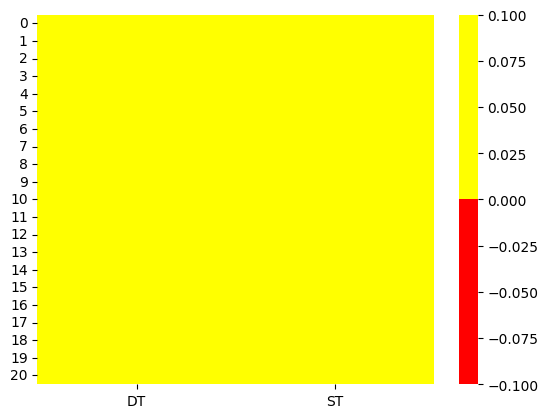

In [217]:
#Heat map
import seaborn as sns
cols = df.columns
colors = ['red','yellow']
sns.heatmap(df[cols].isnull(), cmap= sns.color_palette(colors))

It shows no missing value

In [218]:
#check for duplicate rows
df[df.duplicated()].shape

(0, 2)

No duplicate rows

In [219]:
df.describe()

,DT,ST
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x794f6194d7b0>,
 'caps': [<matplotlib.lines.Line2D at 0x794f6194dcf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x794f6194d510>],
 'medians': [<matplotlib.lines.Line2D at 0x794f6194e230>],
 'fliers': [<matplotlib.lines.Line2D at 0x794f6194e4d0>],
 'means': []}

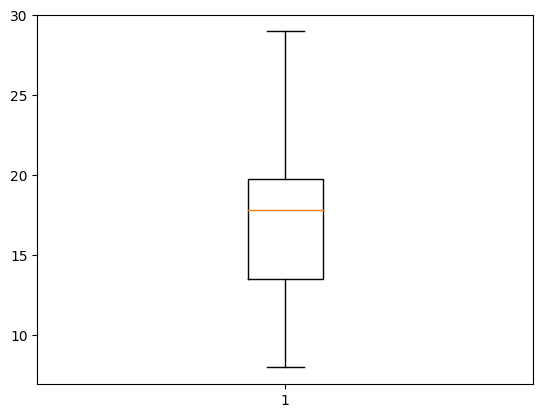

In [220]:
#outlier Detection
import matplotlib.pyplot as plt
plt.boxplot(df['DT'])


{'whiskers': [<matplotlib.lines.Line2D at 0x794f6196fdc0>,
 'caps': [<matplotlib.lines.Line2D at 0x794f616c8340>,
 'boxes': [<matplotlib.lines.Line2D at 0x794f6196fb20>],
 'medians': [<matplotlib.lines.Line2D at 0x794f616c8880>],
 'fliers': [<matplotlib.lines.Line2D at 0x794f616c8b20>],
 'means': []}

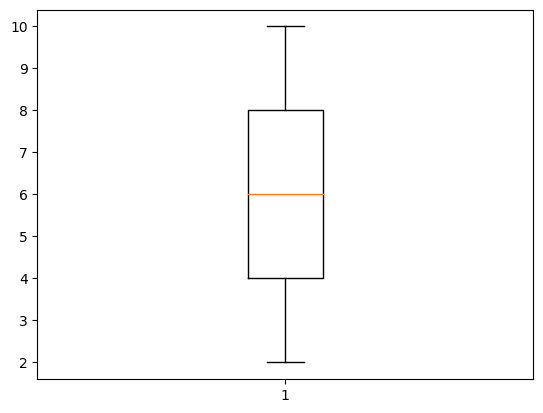

In [221]:
plt.boxplot(df['ST'])

No outliers


<ipython-input-222-b6d66f3f0e1f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["ST"])


<Axes: xlabel='ST', ylabel='Density'>

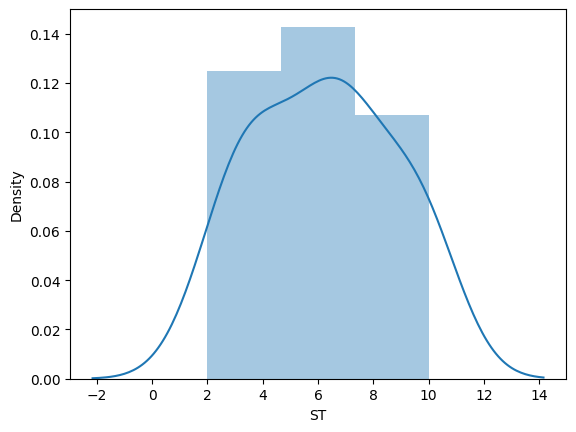

In [222]:
sns.distplot(df["ST"])

<Axes: xlabel='ST', ylabel='DT'>

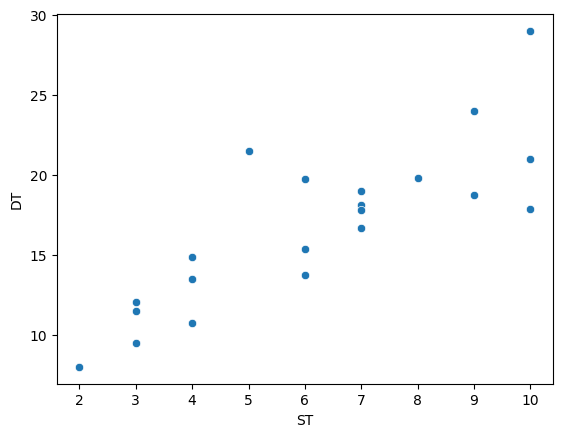

In [223]:
sns.scatterplot(x="ST",y="DT",data=df)

<Axes: xlabel='ST', ylabel='DT'>

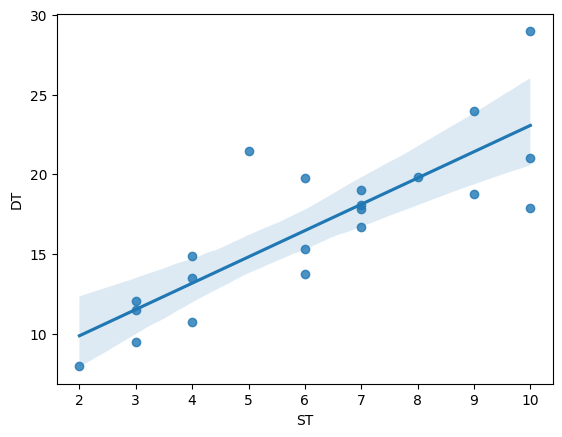

In [224]:
sns.regplot(x="ST",y="DT",data=df)

In [225]:
#Correlation Analysis
df.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


In [226]:
#Model Building
import statsmodels.formula.api as smf
model = smf.ols("DT ~ ST",data = df).fit()

In [227]:
#Model Testing
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           3.98e-06
Time:                        08:51:44   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model accuracy is 68.2%

In [228]:
pred = model.predict(df["ST"])

In [229]:
model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [230]:
rmse = np.sqrt(np.mean((np.array(df["DT"])-np.array(pred))**2))
rmse

2.7916503270617654

<Axes: xlabel='ST', ylabel='DT'>

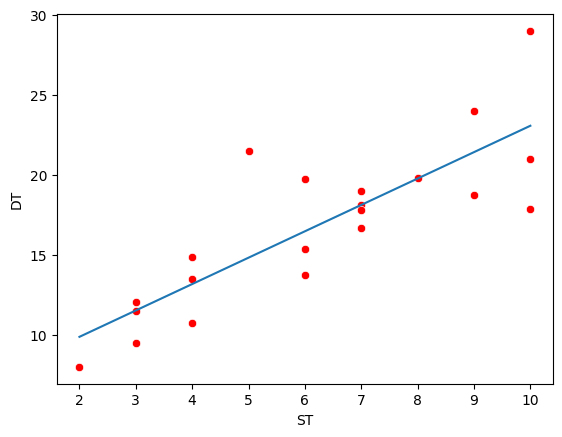

In [231]:
sns.scatterplot(x="ST",y="DT",data=df,color="red")
sns.lineplot(x="ST",y=pred,data=df)

In [232]:
# Logarithmic Transformation
model2 = smf.ols("DT~np.log(ST)",data = df).fit()

In [233]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           2.64e-06
Time:                        08:51:45   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(ST)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model accuracy is slightly increased to 69.5%

In [234]:
pred2 = model2.predict(df["ST"])

In [235]:
rmse2 = np.sqrt(np.mean((np.array(df["DT"])-np.array(pred2))**2))
rmse2

2.733171476682066

<Axes: xlabel='ST', ylabel='DT'>

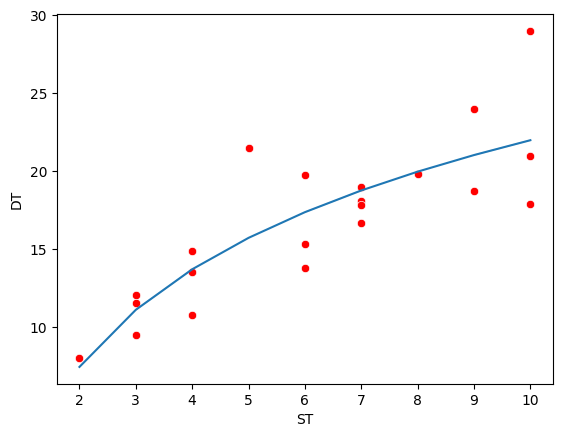

In [236]:
sns.scatterplot(x="ST",y="DT",data=df,color="red")
sns.lineplot(x="ST",y=pred2,data=df)

In [237]:
#Exponential transformation 2
model3 = smf.ols("np.log(DT)~ST",data = df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           1.59e-06
Time:                        08:51:46   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
ST             0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model accuracy increased to 71.1%

In [238]:
pred3= model3.predict(df["ST"])

In [239]:
pred3=np.exp(pred3)

In [240]:
rmse3 = np.sqrt(np.mean((np.array(df["DT"])-np.array(pred3))**2))
rmse3

2.9402503230562007

<Axes: xlabel='ST', ylabel='DT'>

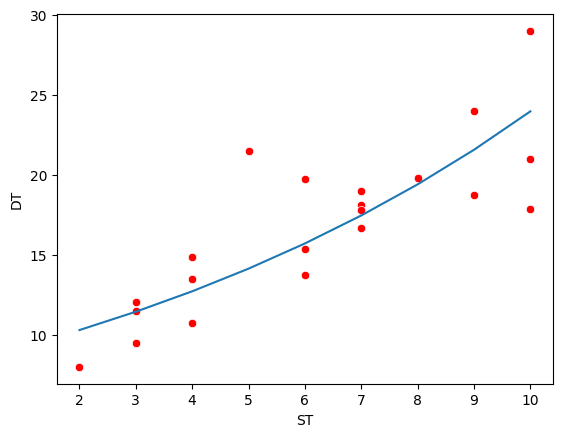

In [241]:
sns.scatterplot(x="ST",y="DT",data=df,color="red")
sns.lineplot(x="ST",y=pred3,data=df)

In [242]:
#transformation 3
df["ST_sq"]=df["ST"]*df["ST"]

df.head()

,DT,ST,ST_sq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100


In [243]:
#Squared transformation
model4 = smf.ols("np.log(DT)~(ST+ST_sq)",data = df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     29.28
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           2.20e-06
Time:                        08:51:47   Log-Likelihood:                 9.9597
No. Observations:                  21   AIC:                            -13.92
Df Residuals:                      18   BIC:                            -10.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6997      0.228      7.441      0.000       1.220       2.180
ST             0.2659      0.080      3.315      0.004       0.097       0.434
ST_sq         -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [244]:
pred4 = model4.predict(df[["ST","ST_sq"]])

In [245]:
pred4=np.exp(pred4)

In [246]:
rmse4 = np.sqrt(np.mean((np.array(df["DT"])-np.array(pred4))**2))
rmse4

2.799041988740932

<Axes: xlabel='ST', ylabel='DT'>

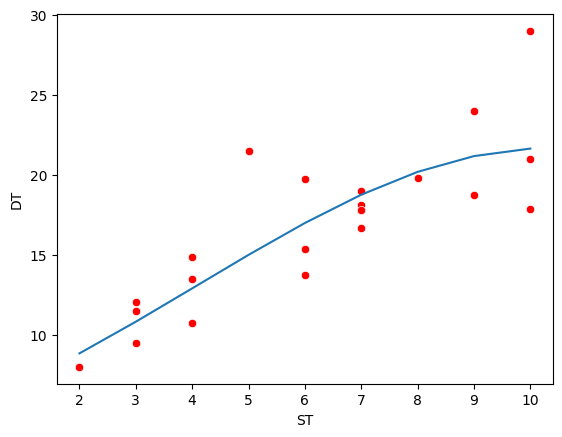

In [247]:
sns.scatterplot(x="ST",y="DT",data=df,color="red")
sns.lineplot(x="ST",y=pred4,data=df)

<Axes: >

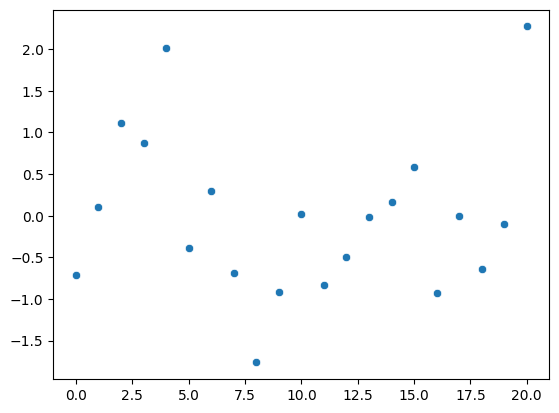

In [248]:
sns.scatterplot(model.resid_pearson)

In [249]:
#transformation 3
df["ST_cube"]=df["ST"]*df["ST"]*df["ST"]
df.head()

,DT,ST,ST_sq,ST_cube
0,21.00,10,100,1000
1,13.50,4,16,64
2,19.75,6,36,216
3,24.00,9,81,729
4,29.00,10,100,1000


In [250]:
model5 = smf.ols("np.log(DT)~(ST+ST_sq+ ST_cube)",data = df).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     20.31
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           7.37e-06
Time:                        08:51:48   Log-Likelihood:                 10.748
No. Observations:                  21   AIC:                            -13.50
Df Residuals:                      17   BIC:                            -9.317
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0716      0.591      1.814      0.087      -0.175       2.318
ST             0.6495      0.343      1.896      0.075      -0.073       1.372
ST_sq         -0.0809      0.059     -1.361      0.191      -0.206       0.045
ST_cube        0.0036      0.003      1.151      0.266      -0.003       0.010
==============================================================================
Omnibus:                        0.352   Durbin-Watson:                   1.450
Prob(Omnibus):                  0.839   Jarque-Bera (JB):                0.371
Skew:                           0.260   Prob(JB):                        0.831
Kurtosis:                       2.608   Cond. No.                     9.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Accuracy is increased to 78.2%

In [251]:
pred5 = model5.predict(df[["ST","ST_sq","ST_cube"]])

In [252]:
pred5 = np.exp(pred5)

In [253]:
rmse5 = np.sqrt(np.mean((np.array(df["DT"])-np.array(pred5))**2))
rmse5

2.7067567724485166

In [254]:
print(rmse)
print(rmse2)
print(rmse3)
print(rmse4)
print(rmse5)

2.7916503270617654
2.733171476682066
2.9402503230562007
2.799041988740932
2.7067567724485166


For model 5, accuracy is increased and RMSE is also decreased, so best model is model 5

# Model Validation

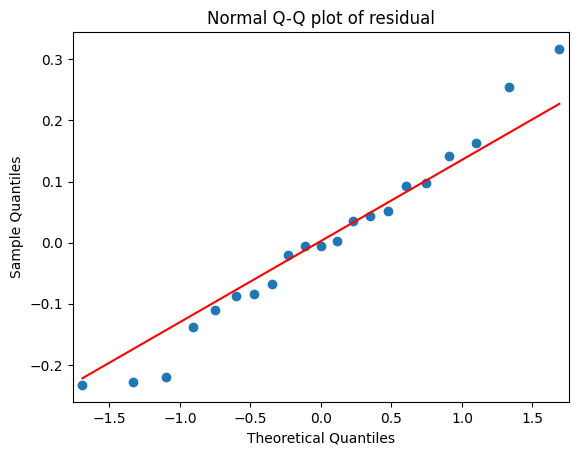

In [255]:
#QQ plot
import statsmodels.api as sm
qqplot = sm.qqplot(model5.resid, line = 'q')
plt.title('Normal Q-Q plot of residual')
plt.show()

<ipython-input-256-ed454ff4b47a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model5.resid_pearson)


<Axes: ylabel='Density'>

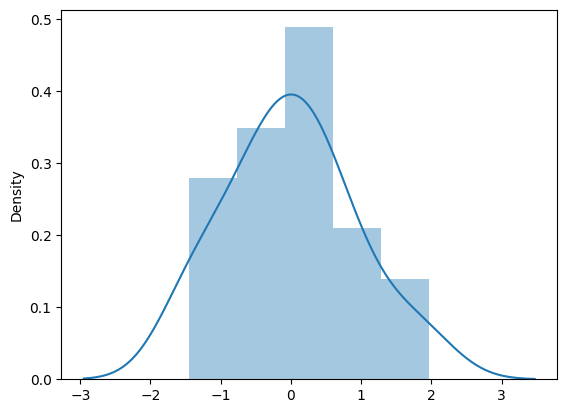

In [256]:
sns.distplot(model5.resid_pearson)

<Axes: >

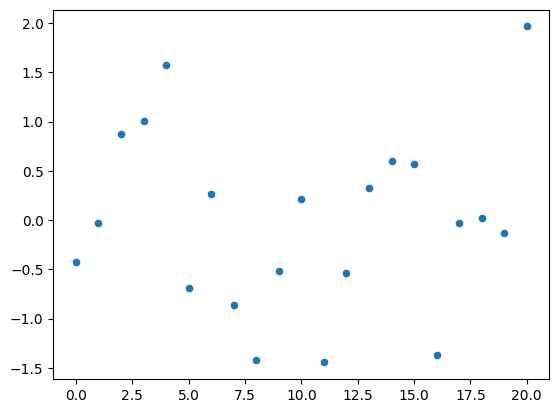

In [257]:
sns.scatterplot(model5.resid_pearson)

In [258]:
#Data Prediction
new_data = pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [259]:
dp = pd.DataFrame(new_data, columns =['ST'])
dp

,ST
0,5
1,8


In [260]:
model.predict(dp)

0    14.827833
1    19.774893
dtype: float64